# Spectral Cluster Counting

Trying to count coincidences based on the histogram information.

In [74]:
# import libraries
import raadpy as rp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

In [2]:
# Define some constants
raw_dir = '../../Data/RAW/'
SD      = 'SD-1124'
TIME    = 1e-3

# Plot the orbit data

An overarching view of the dataset

In [3]:
# Plot the orbit data for this run
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff1.dat'
fname           = buffer_fname.split('/')[-1]

# Decode the buffer data in a dictionary
data_SiPM   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 1")
data_PMT    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 0")

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

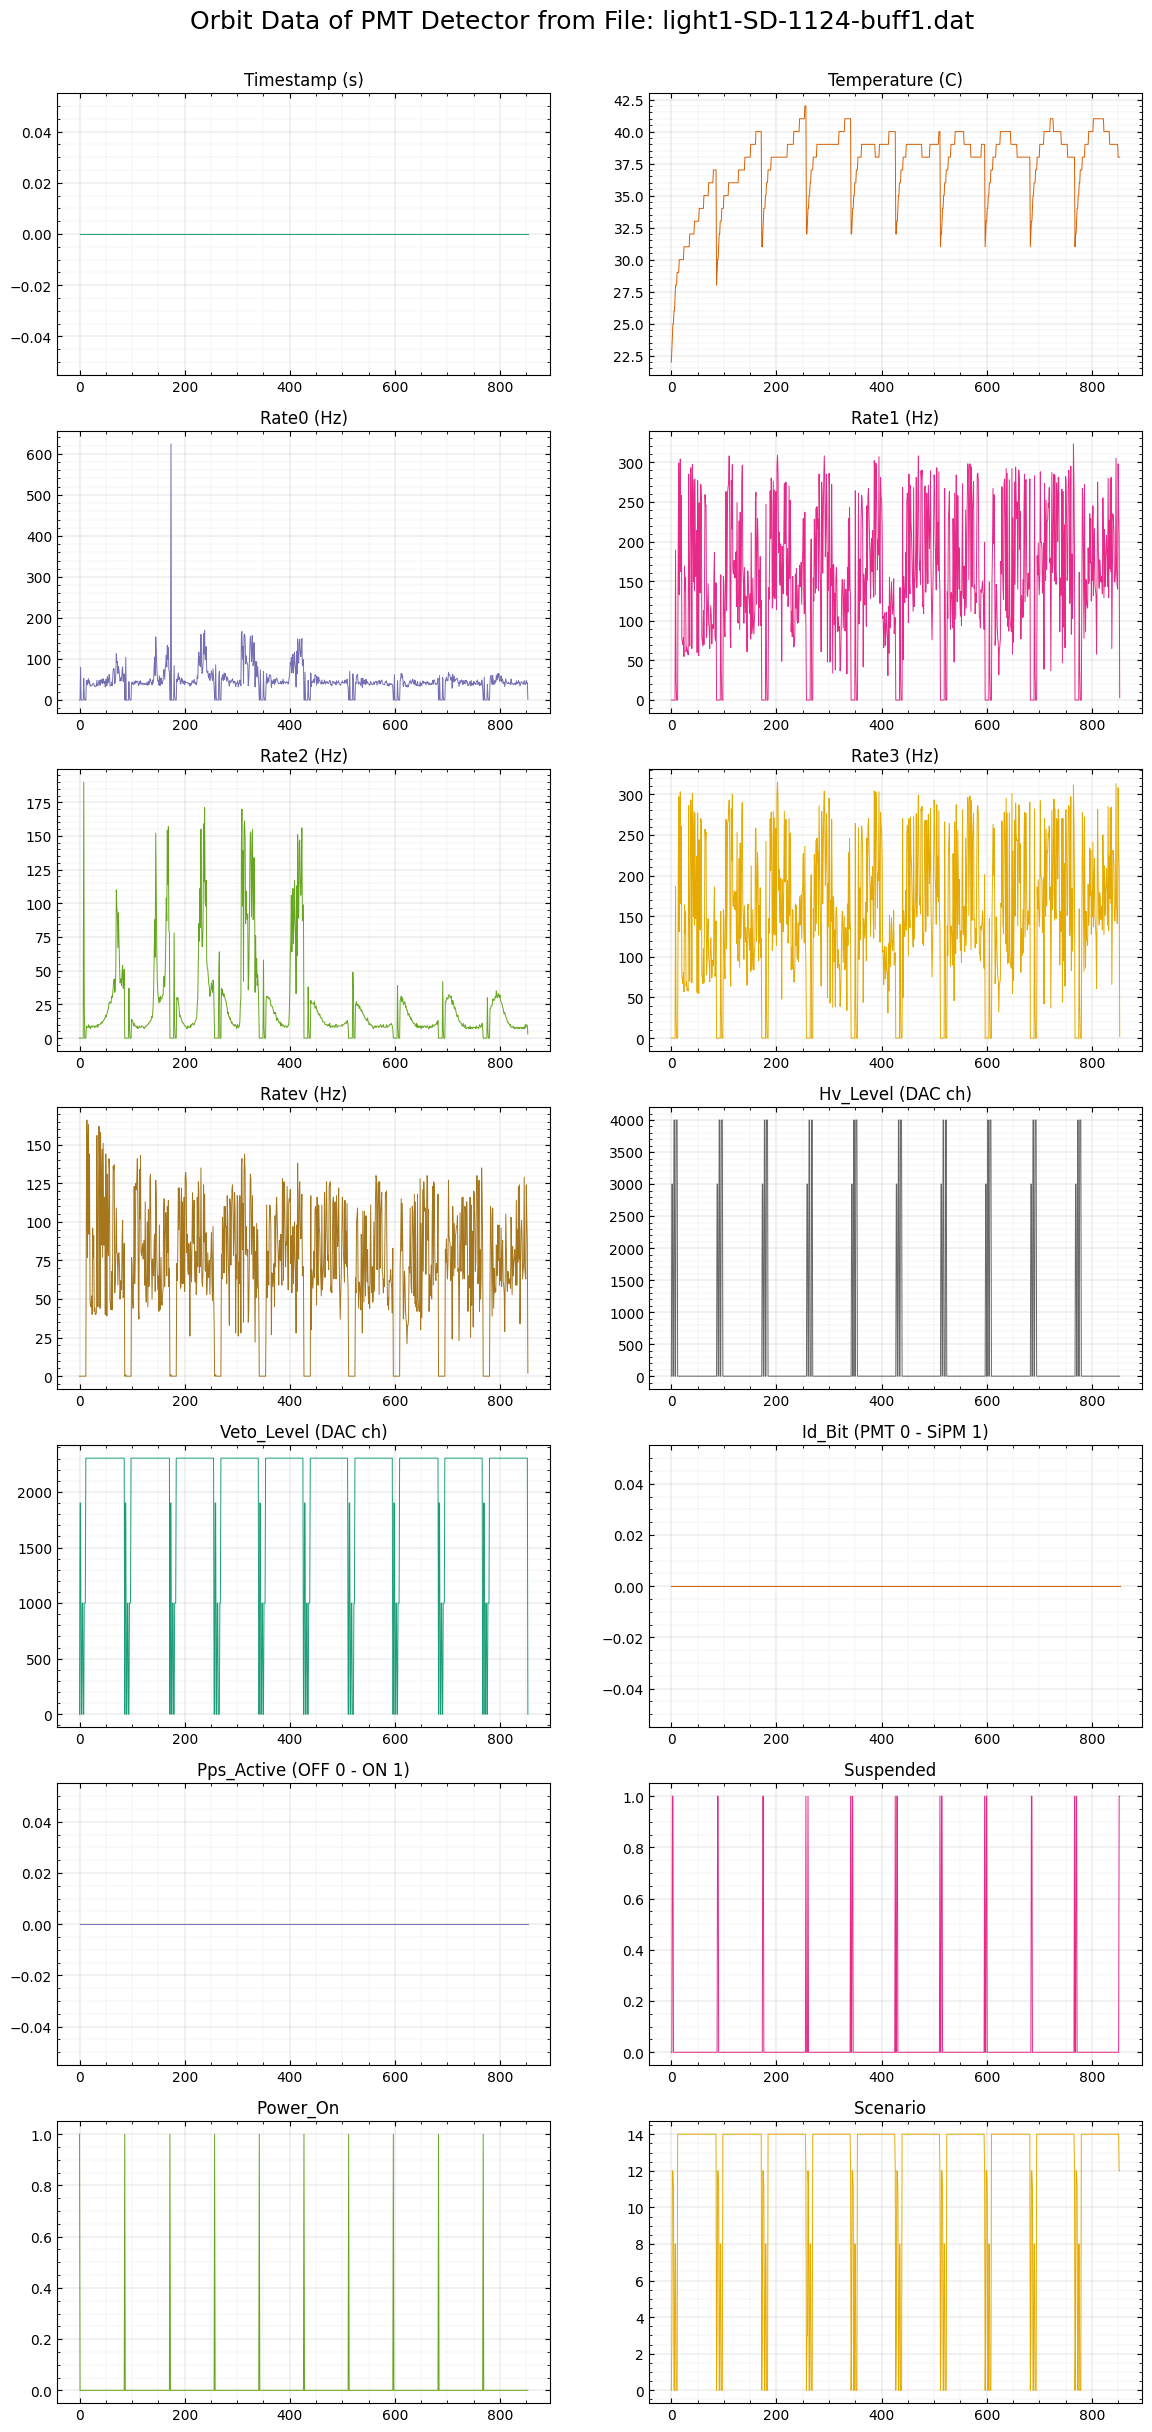

In [4]:
# PMT
fig, axes  = rp.plot_buffer(data_PMT,title = 'Orbit Data of PMT Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

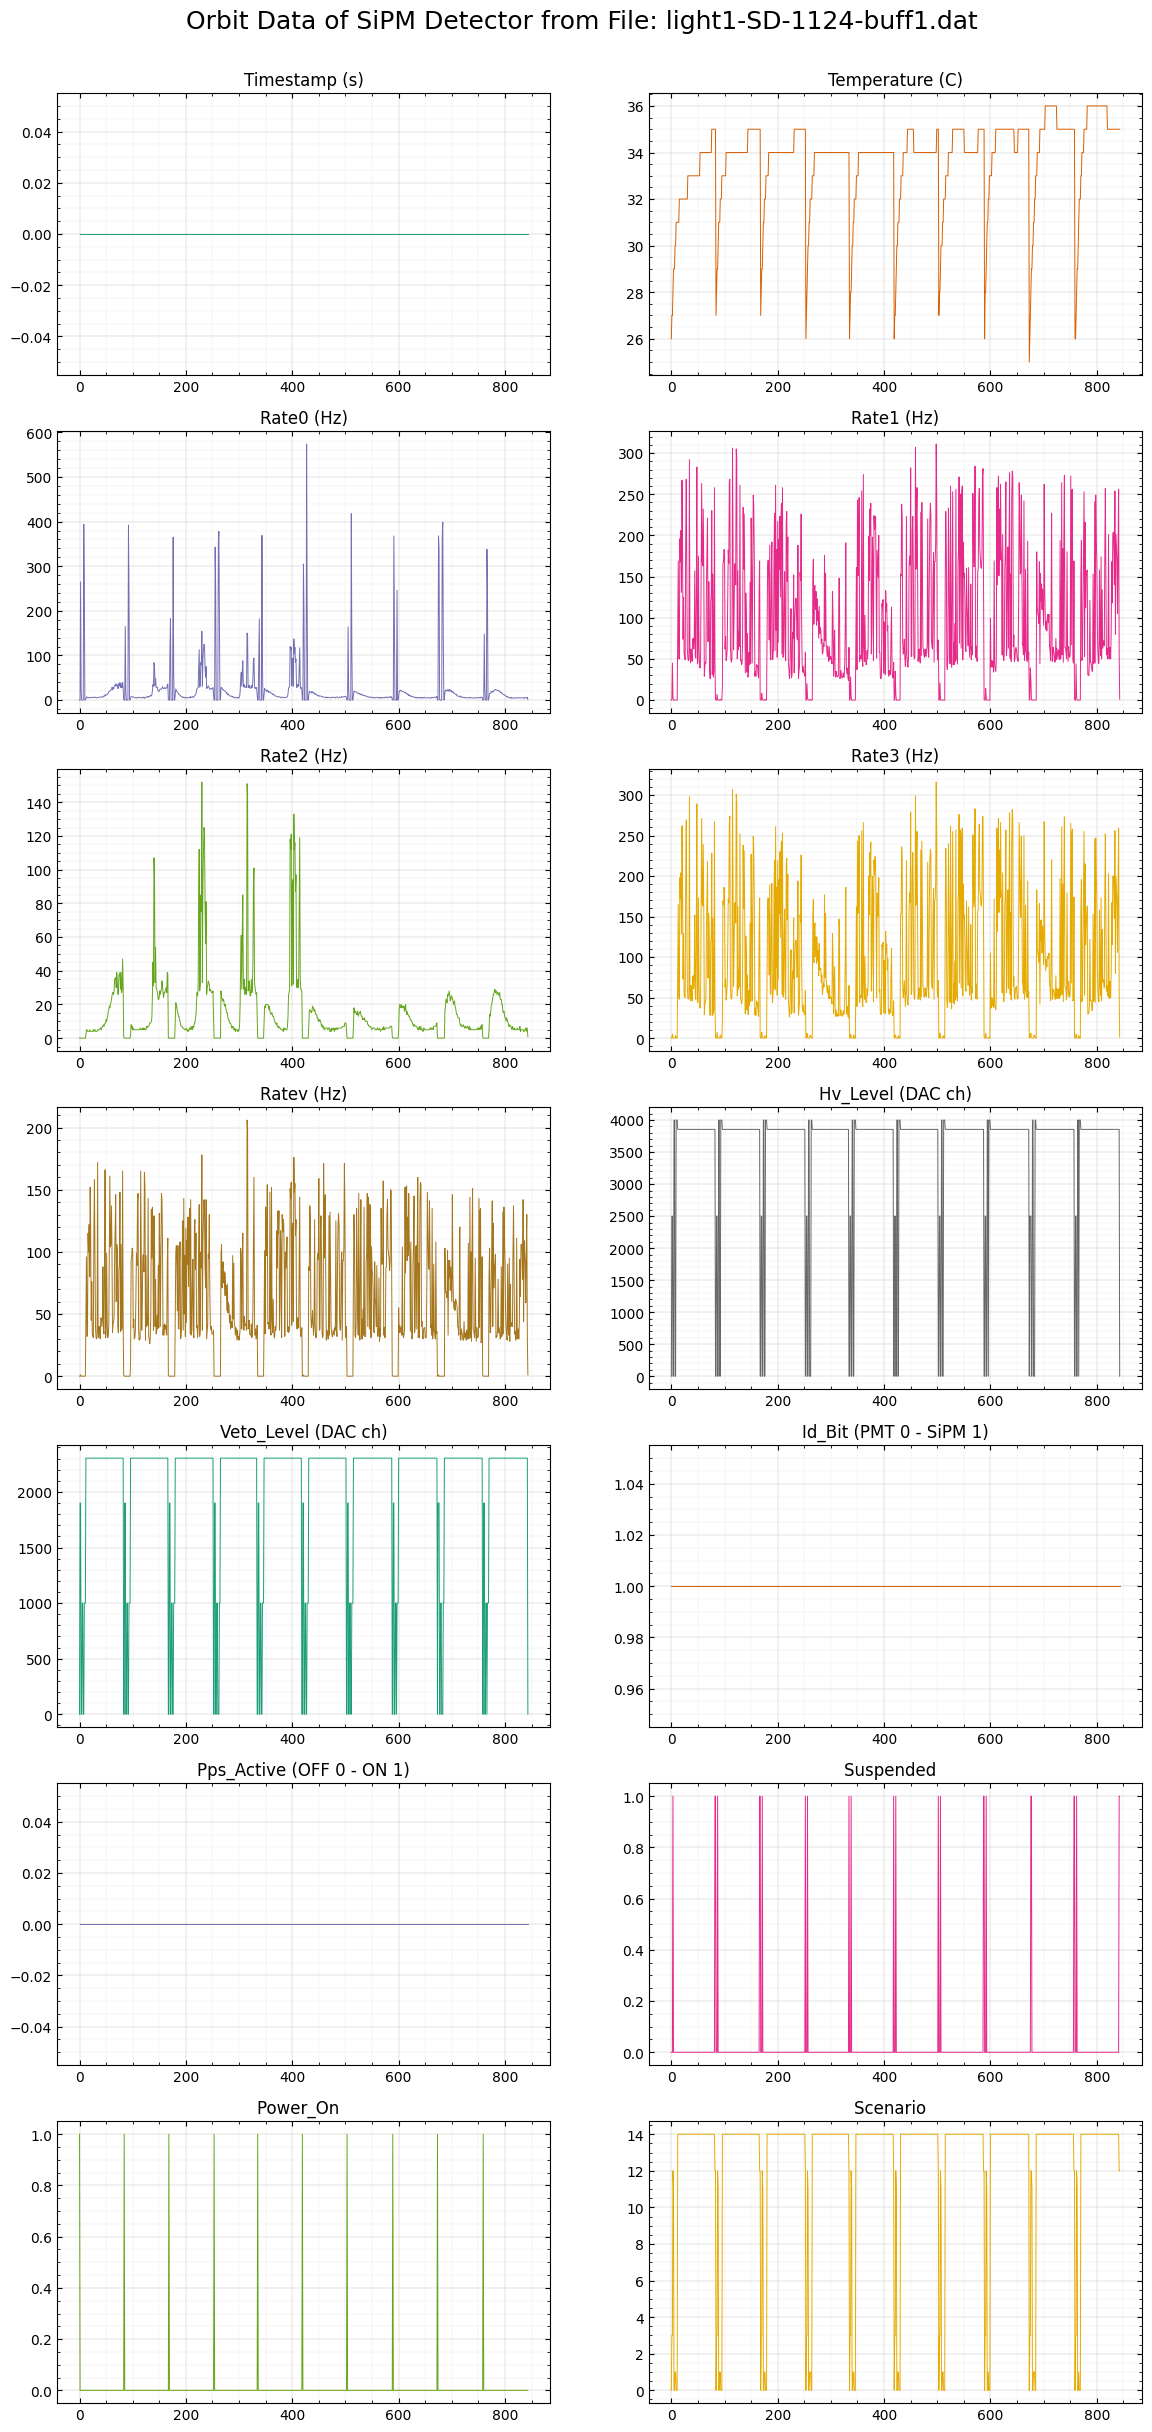

In [5]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM, title = 'Orbit Data of SiPM Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

# Pick a buffer and display it

Then get a buffer corresponding to this orbit data and plot it.


- BUFFER 1 - Orbit Data
- BUFFER 2 - TGF SiPM
- BUFFER 3 - TGF PMT
- BUFFER 4 - Non Veto SiPM
- BUFFER 5 - Non Veto PMT
- BUFFER 6 - Veto SiPM
- BUFFER 7 - Veto PMT
- BUFFER 8 - Reserved SiPM
- BUFFER 9 - Reserved PMT

In [6]:
# NONVETO BUFFERS

# Directory of the buffer
buffer_fname = raw_dir + SD + '/light1-'+SD+'-buff4.dat'

# Decode the buffer data in a dictionary
data         = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

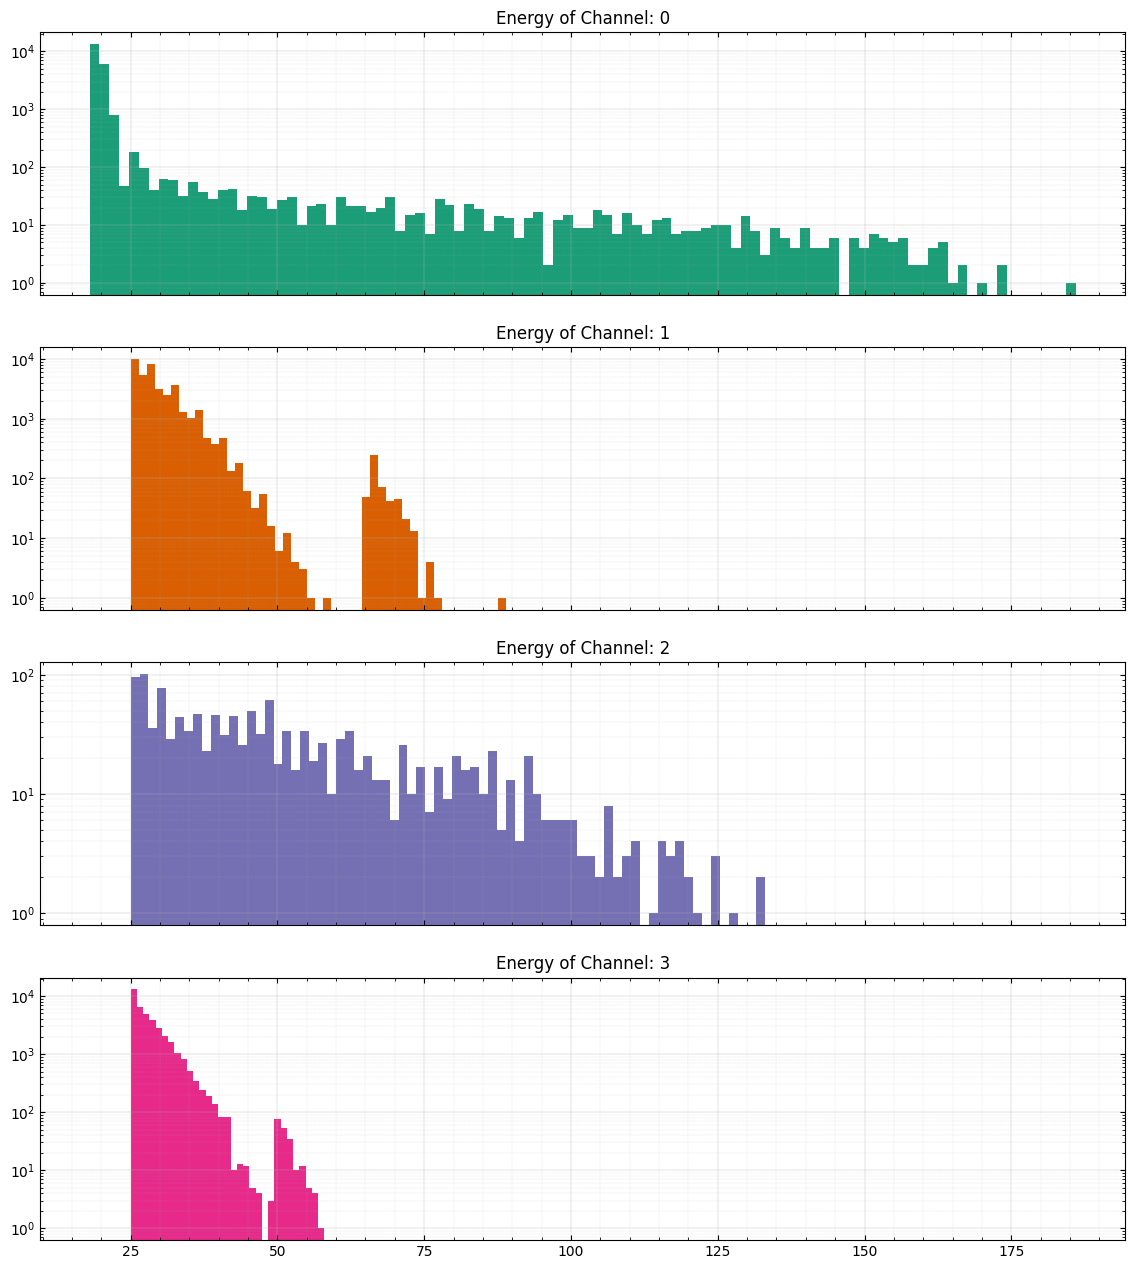

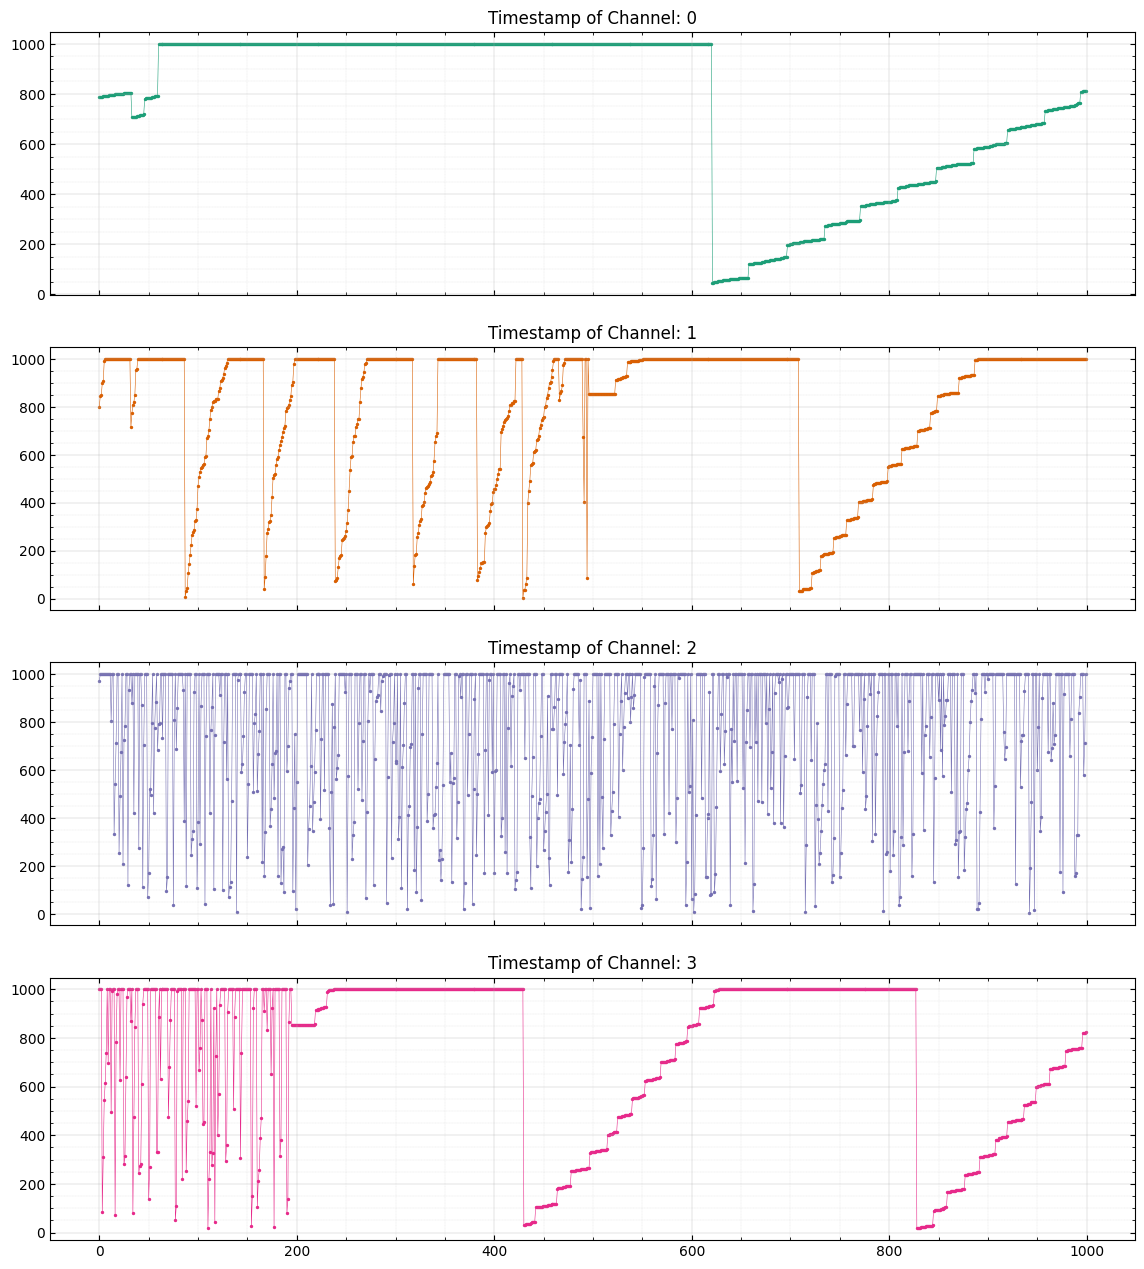

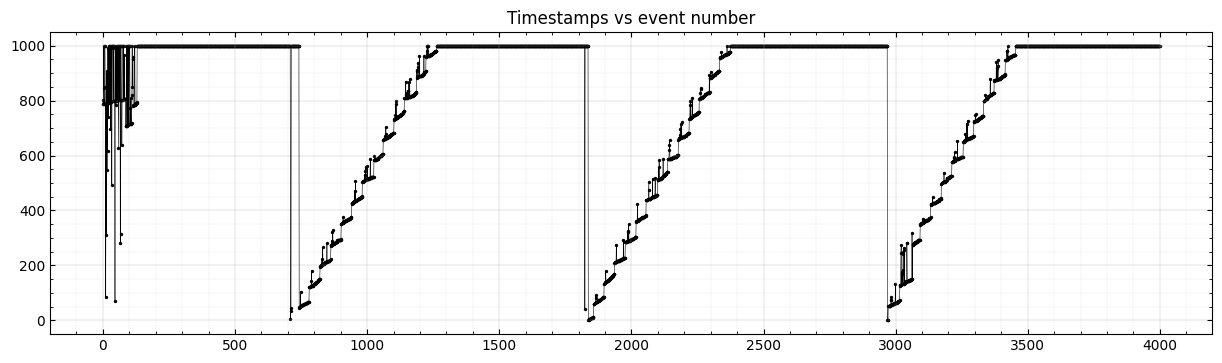

In [7]:
# Plot the buffers details

# Histograms
rp.plot_hists(data, rp.NONVETO_STRUCT,bins=100);

# Timestamps
rp.plot_timestamps(data, rp.NONVETO_STRUCT,RANGE=(0,1000));

# Full timestamp
rp.plot_timestamp(data, RANGE=(0,4*1000));

# Now perform the analysis

First we collect data from multiple files

In [8]:
def concatenate(set1, set2):
    """Take two datasets and append them to each otehr

    Args:
        set1 (_type_): The first dataset
        set2 (_type_): The second dataset
    """
    # New dictionary
    combined = {}

    # Concatenate the two dictionaries
    for key in set1.keys():
        combined[key] = np.append(set1[key],set2[key])

    return combined
    

In [30]:
# Download a bunch of data
raw = rp.download_time_delta(buffer=7,start='2022-05-01', end='2022-05-06')
print(raw[:min(len(raw),6)])

# Save the data
filename =rp.save_raw_data(raw,buffer=7)

[{'seq_nr': 33025, 'entry_nr': 6023, 'file_ver': 13, 'entry_data': '\\x04a240000000115102ea040000001cfe', 'archived_ts': '2022-05-05T01:41:33.362775'}, {'seq_nr': 33026, 'entry_nr': 6024, 'file_ver': 13, 'entry_data': '\\x0392200000001f08', 'archived_ts': '2022-05-05T01:41:33.362775'}, {'seq_nr': 33027, 'entry_nr': 6025, 'file_ver': 13, 'entry_data': '\\x039202000000010d', 'archived_ts': '2022-05-05T01:41:33.363756'}, {'seq_nr': 33028, 'entry_nr': 6026, 'file_ver': 13, 'entry_data': '\\x132310000000270f', 'archived_ts': '2022-05-05T01:41:33.363756'}, {'seq_nr': 33029, 'entry_nr': 6027, 'file_ver': 13, 'entry_data': '\\x14f82000000008d2', 'archived_ts': '2022-05-05T01:41:33.363756'}, {'seq_nr': 33030, 'entry_nr': 6028, 'file_ver': 13, 'entry_data': '\\x08c0100000002676081620000000270f', 'archived_ts': '2022-05-05T01:41:33.363756'}]


In [33]:
# Load the saved data
data = rp.get_dict(filename,struct=rp.VETO_STRUCT,STUPID=True)

Line:   0%|          | 0/387492 [00:00<?, ?it/s]

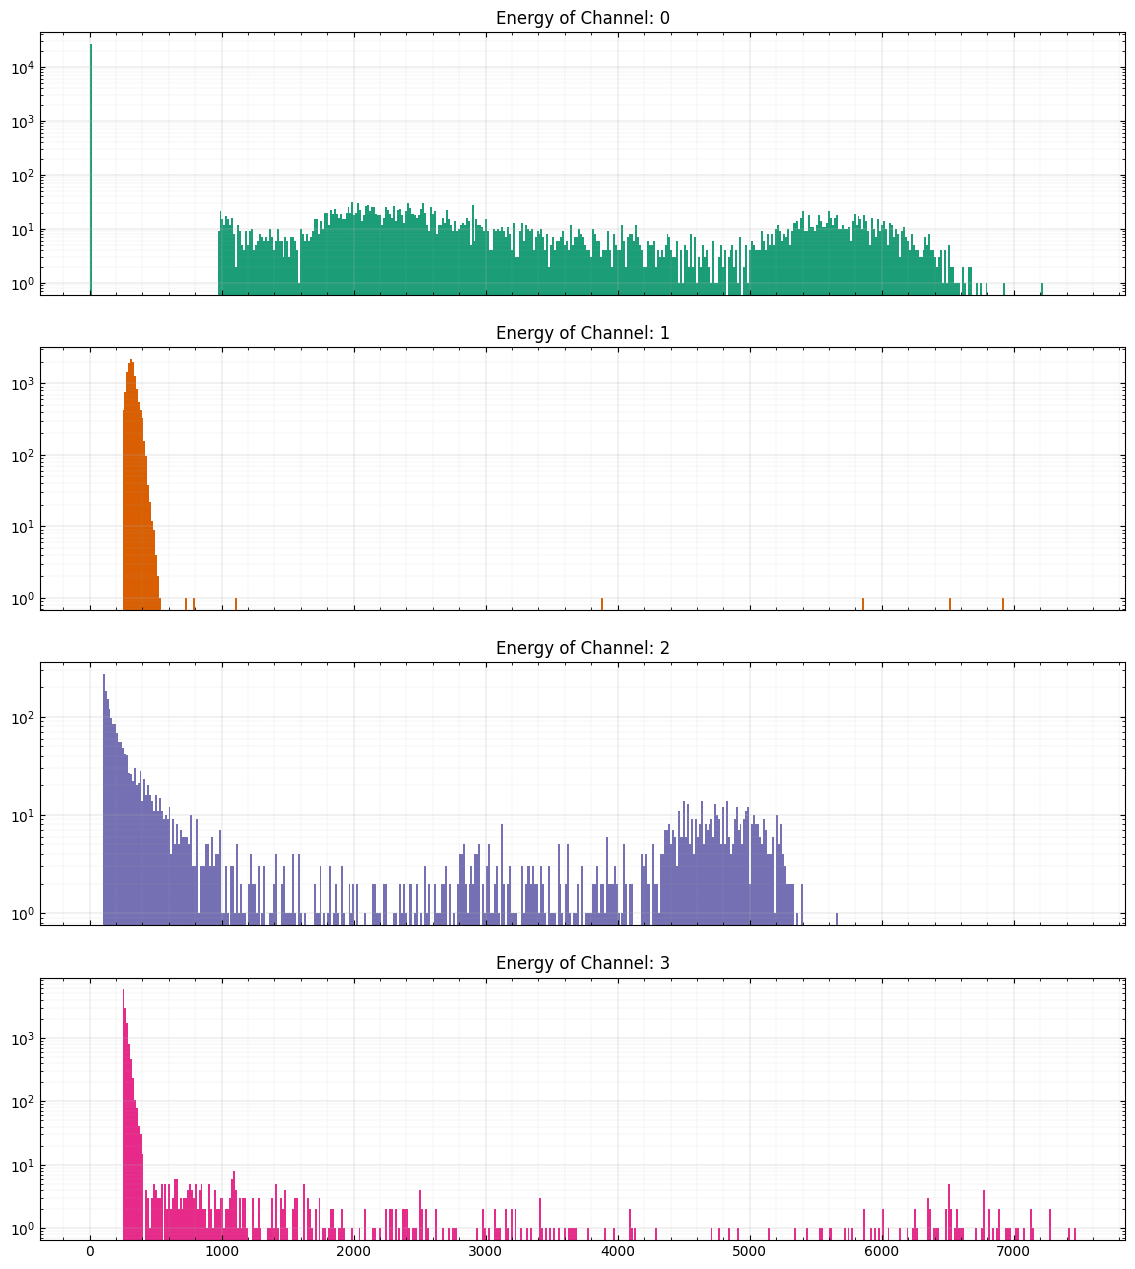

In [64]:
# Plot the histograms
s = lambda x: sum([int(i) for i in "{0:b}".format(int(x))])
num = np.array([s(x) for x in data['veto']])
idx = np.where(num==2)[0]

dat = {key:data[key][idx] for key in data.keys()}

fig, ax = rp.plot_hists(dat, rp.VETO_STRUCT,bins=501)

In [249]:
def detector_illustration(veto_mask:int=None,channel=None,LINE:bool=False):
    # Create a diagram of the payload
    fig = plt.figure(figsize=(3,3),dpi=170)
    ax  = fig.add_subplot(111)
    ax.set_axis_off()

    # Create the layout
    length      = 1
    padding     = 3e-2*length
    veto_side   = 1e-1*length
    cryst_side  = (length - 5*padding - 2*veto_side)/2

    # Create the vetos
    veto = [
        patches.Rectangle((padding,3*padding+veto_side+cryst_side), veto_side, cryst_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),
        patches.Rectangle((padding,2*padding+veto_side), veto_side, cryst_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),

        patches.Rectangle((2*padding+veto_side,padding), cryst_side, veto_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),
        patches.Rectangle((3*padding+veto_side+cryst_side,padding), cryst_side, veto_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),

        patches.Rectangle((4*padding+veto_side+2*cryst_side,2*padding+veto_side), veto_side, cryst_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),
        patches.Rectangle((4*padding+veto_side+2*cryst_side,3*padding+veto_side+cryst_side), veto_side, cryst_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),

        patches.Rectangle((3*padding+veto_side+cryst_side,4*padding + veto_side + 2*cryst_side), cryst_side, veto_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),
        patches.Rectangle((2*padding+veto_side,4*padding + veto_side + 2*cryst_side), cryst_side, veto_side, linewidth=1, edgecolor='deepskyblue', facecolor='none'),
    ]

    crystals = [
        patches.Rectangle((2*padding + veto_side,3*padding+veto_side + cryst_side), cryst_side, cryst_side, linewidth=1, edgecolor='k', facecolor='none'),
        patches.Rectangle((2*padding + veto_side,2*padding+veto_side), cryst_side, cryst_side, linewidth=1, edgecolor='k', facecolor='none'),
        patches.Rectangle((3*padding + veto_side + cryst_side,2*padding+veto_side), cryst_side, cryst_side, linewidth=1, edgecolor='k', facecolor='none'),
        patches.Rectangle((3*padding + veto_side + cryst_side,3*padding+veto_side + cryst_side), cryst_side, cryst_side, linewidth=1, edgecolor='k', facecolor='none'),
    ]

    # Light up the detectors hit with the veto mask
    if veto_mask is not None:
        detectors = decode_veto(veto_mask)

        for d in detectors: veto[d].set_facecolor('deepskyblue')

        # If you want to add a line
        if LINE:
            # Create the effect of the particle passing through
            a = detectors[0]
            b = detectors[1]

            # Add the line
            point_a = np.mean(veto[a].get_bbox().corners(),axis=0)
            point_b = np.mean(veto[b].get_bbox().corners(),axis=0)
            ax.axline(point_a,point_b, c = 'k',ls=':')

            # Change the colors
            veto[a].set_facecolor('deepskyblue')
            veto[b].set_facecolor('deepskyblue')

    
    # Light up the channel
    if channel is not None:
        crystals[channel].set_facecolor('darkgrey')



    for v in veto: ax.add_patch(v)
    for c in crystals: ax.add_patch(c)

    return fig,ax

# We also want to get the detectors from a string and vice versa
def decode_veto(mask:int):
    arr = np.array([int(i) for i in "{0:b}".format(int(mask))])
    return len(arr) - 1 - np.where(arr==1)[0]

def encode_veto(detectors):
    return np.sum([2**i for i in detectors])

# Fiilter data according to mask
def mask_filter(mask:int,data):
    idx = np.where(data['veto'] == mask)
    return {key:data[key][idx] for key in data.keys()}

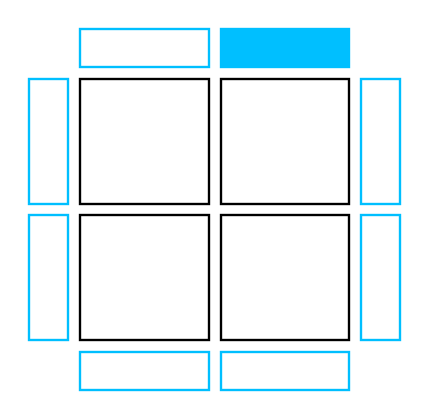

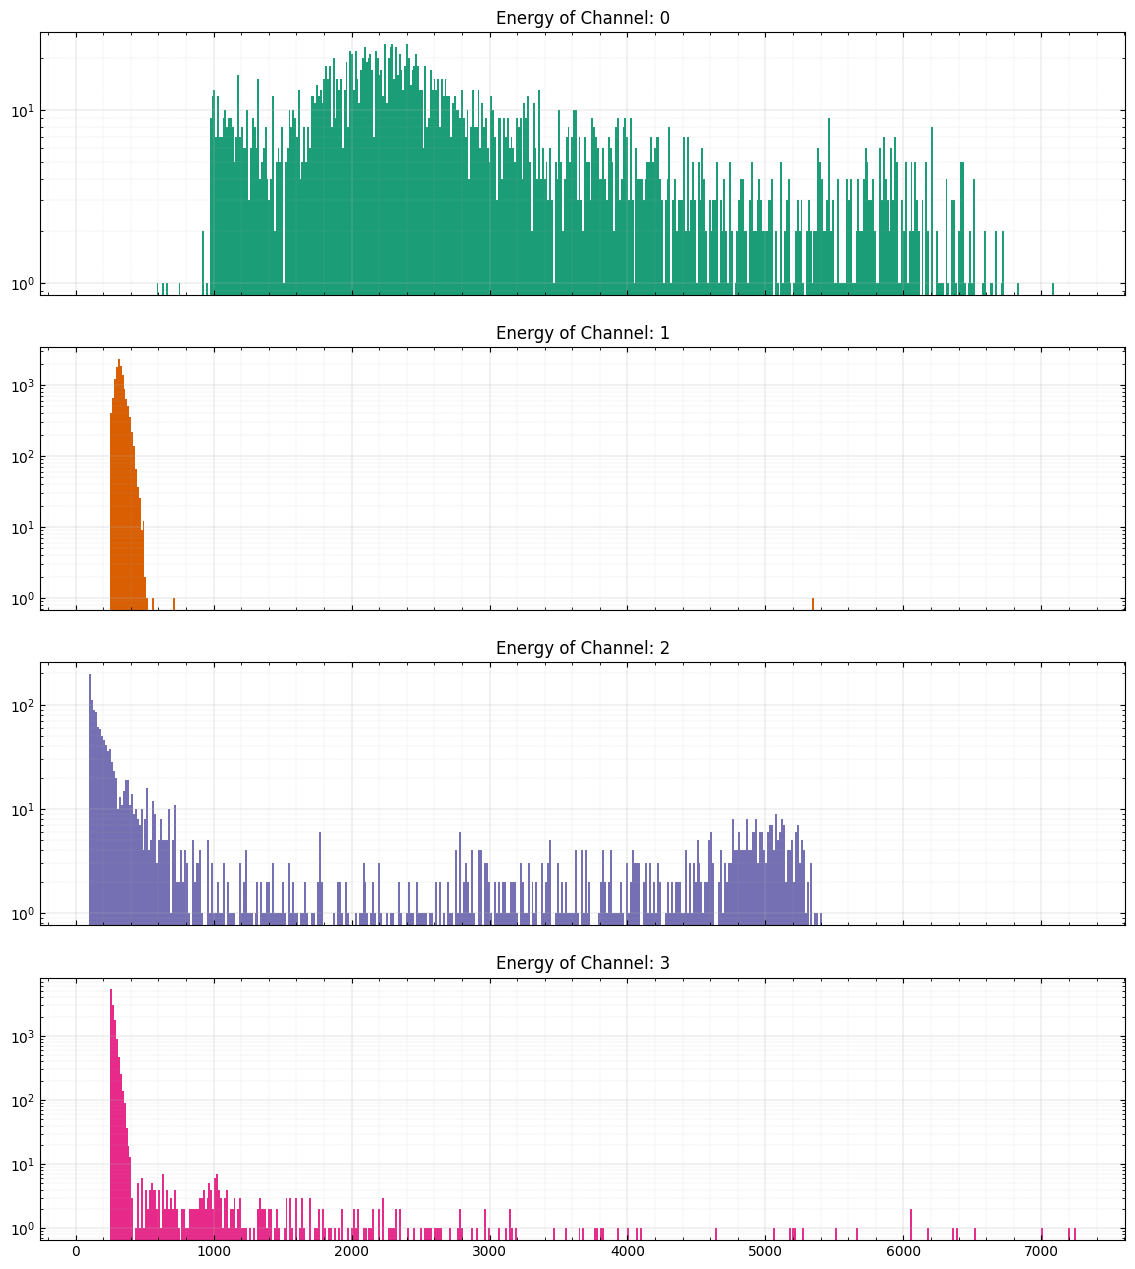

In [265]:
# Plot spectra of particular detector configuration
detectors   = [6]
mask        = encode_veto(detectors)

# Get small plot
f1, ax1 = detector_illustration(veto_mask=mask,LINE=False)

# Get the other plot
fig, ax = rp.plot_hists(mask_filter(mask,data), rp.VETO_STRUCT,bins=501)

In [323]:
range = np.array([4500,5500])

idx = []
for i,d in enumerate(data['adc_counts']):
    if range[0] < d and d < range[1]:
        if data['channel'][i] == 2: idx.append(i)

# for i,d in enumerate(data['veto']):
#     if d == encode_veto([1,4]) or d == encode_veto([2,7]):
#         idx.append(i)

selected = {key:data[key][idx] for key in data.keys()}

In [329]:
hist = [0]*8
number = [0]*10
for i in selected['veto']:
    d = decode_veto(i)
    number[len(d)] += 1
    for j in d:
        hist[j]+=1

<BarContainer object of 8 artists>

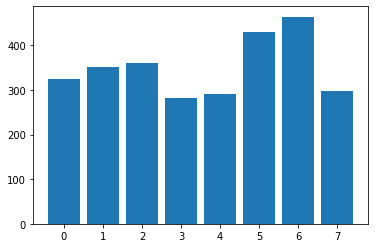

In [330]:
plt.bar([0,1,2,3,4,5,6,7],hist)

<BarContainer object of 10 artists>

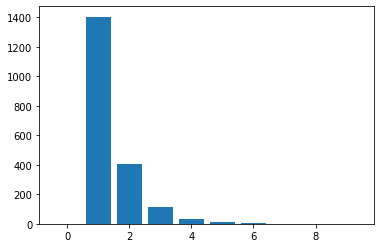

In [331]:
plt.bar([0,1,2,3,4,5,6,7,8,9],number)

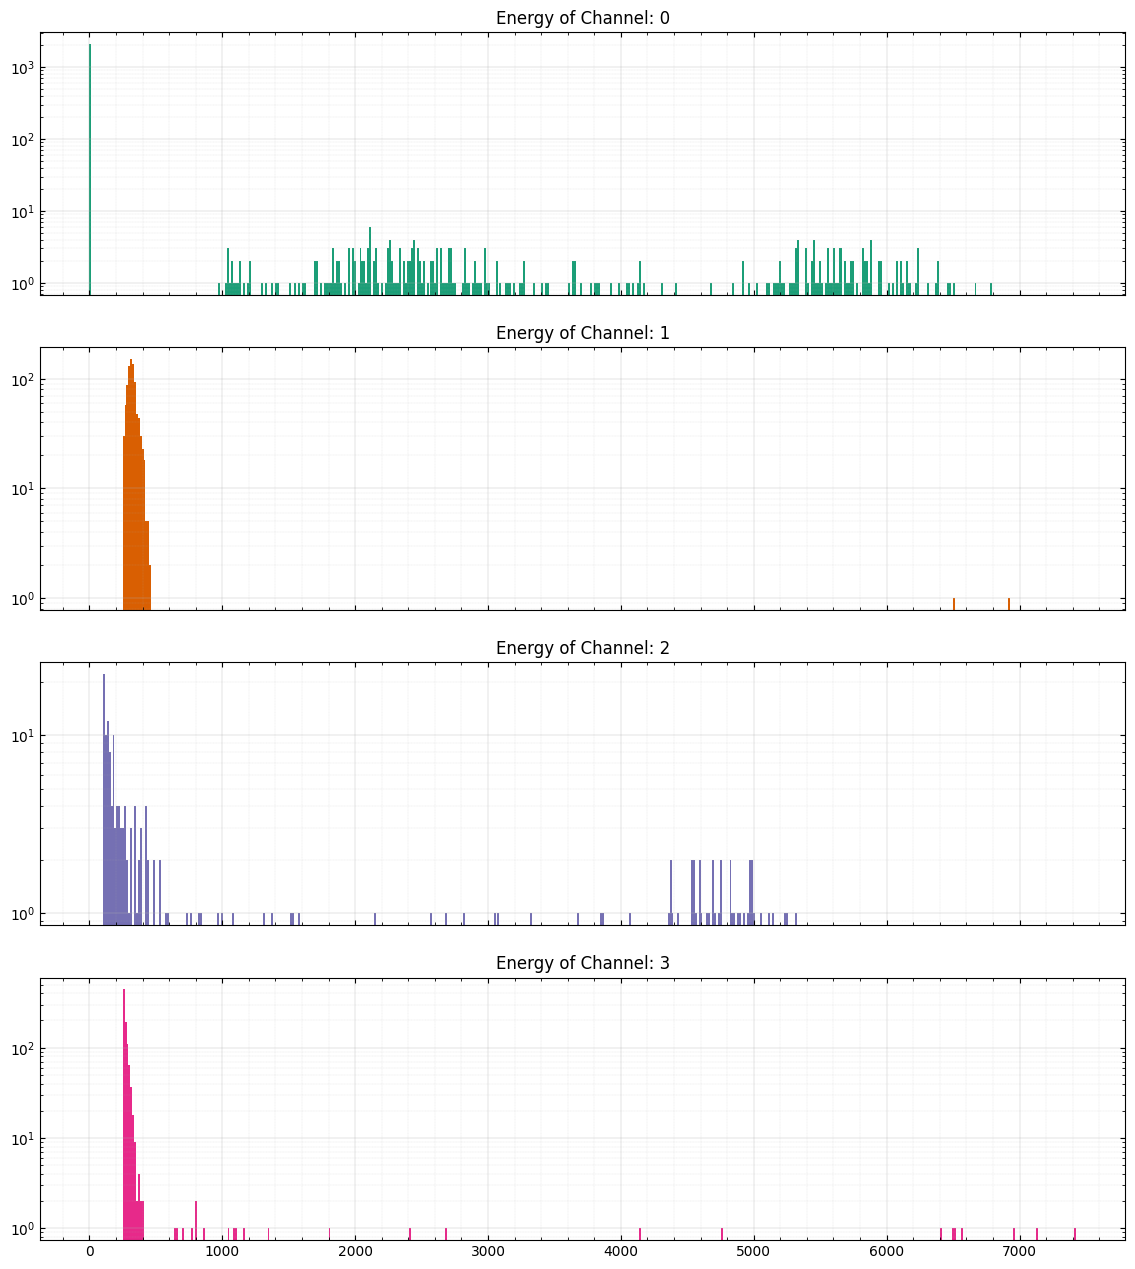

In [317]:
fig, ax = rp.plot_hists(selected, rp.VETO_STRUCT,bins=501)

In [309]:
len(selected['veto'])

3777